<a href="https://colab.research.google.com/github/KaveeshwaraBandara/EN3160/blob/main/EN3160_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1

In [4]:
# Import Q1 image
Q1_IMAGE = cv.imread('/content/drive/MyDrive/EN3160/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert Q1_IMAGE is not None

In [10]:
def piecewise_transform():
    t1 = np.linspace(0, 50, num=51).astype('uint8')
    t2 = np.linspace(100, 255, num=100).astype('uint8')
    t3 = np.linspace(150, 255, num=105).astype('uint8')

    t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    return t

In [11]:
transform = piecewise_transform()

(256,)


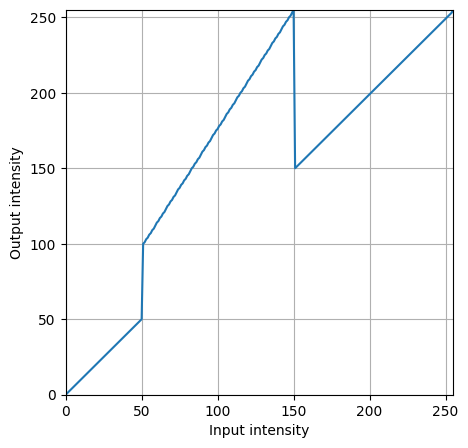

In [12]:
# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(transform)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

#####transform the image numpy array according to the above function(we don't need to write loop to itereate over the array because numpy handles it)

In [13]:
proc_q1_img = transform[Q1_IMAGE]

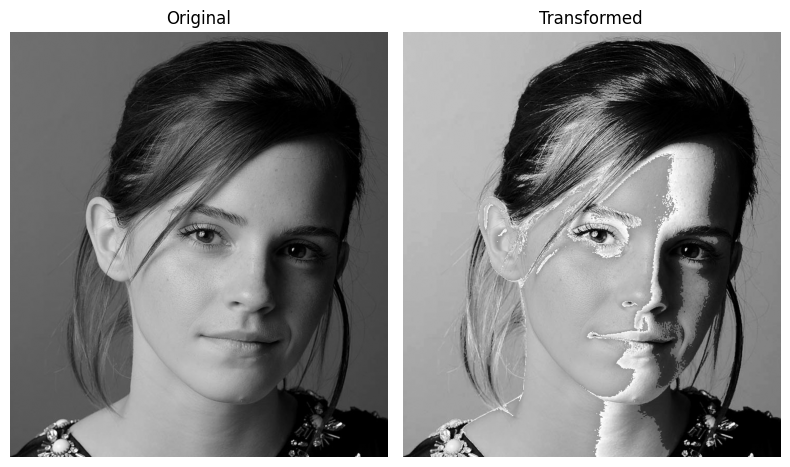

In [14]:
#plot original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(Q1_IMAGE, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(proc_q1_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed')
ax[1].axis("off")

plt.tight_layout()
plt.show()

## Question 2

In [16]:
# Import Q2 image
Q2_IMAGE = cv.imread('/content/drive/MyDrive/EN3160/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert Q2_IMAGE is not None

In [43]:
def accentuate_range_gaussian(image, mu, sigma, scale=255):
    # Create lookup table using Gaussian
    x = np.arange(256)
    transform = scale * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    transform = np.clip(transform, 0, 255).astype(np.uint8)

    # Apply transformation
    return transform[image]

In [47]:
white_matter = accentuate_range_gaussian(Q2_IMAGE, mu=150, sigma=20)
gray_matter = accentuate_range_gaussian(Q2_IMAGE, mu=200, sigma=15)

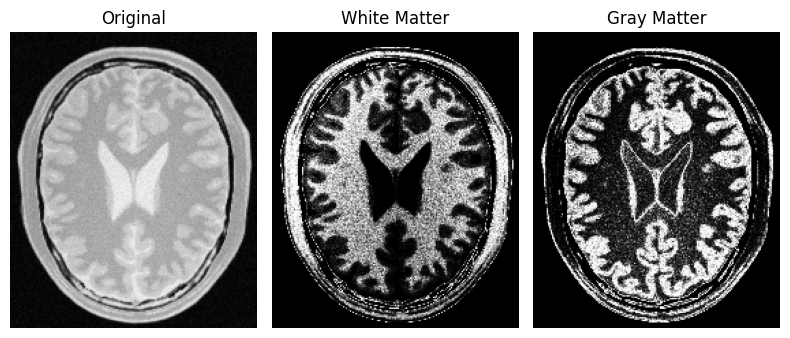

In [48]:
#plot original white matter and gray matter
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
ax[0].imshow(Q2_IMAGE, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(white_matter, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White Matter')
ax[1].axis("off")
ax[2].imshow(gray_matter, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gray Matter')
ax[2].axis("off")

plt.tight_layout()
plt.show()

##Question 3

In [52]:
# Import Q3 image
imq3_bgr = cv.imread('/content/drive/MyDrive/EN3160/a1images/highlights_and_shadows.jpg')
assert imq3_bgr is not None

In [55]:
# Assuming imq3_bgr is your input BGR image loaded via OpenCV

# Convert color spaces
imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

# Split LAB channels
L, a, b = cv.split(imq3_lab)

# Gamma value
gamma = 0.75

# Create LUT using vectorized operation
t = np.array((np.arange(256) / 255.0) ** gamma * 255, dtype='uint8')

# Apply LUT to L channel
L_modified = cv.LUT(L, t)

# Merge channels and convert back to RGB
merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)

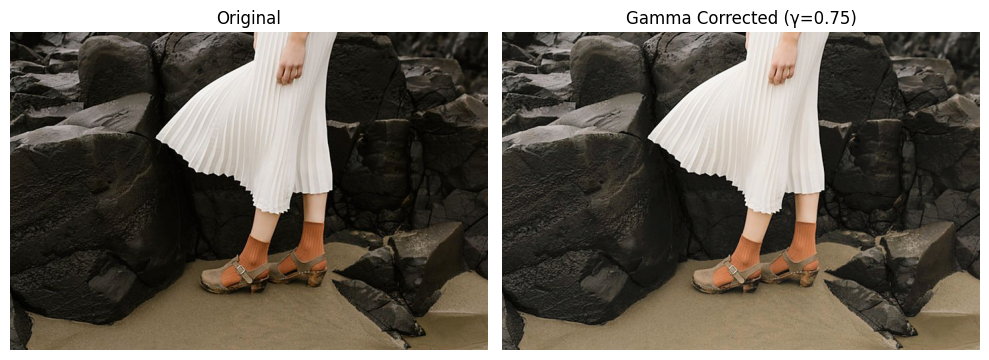

In [54]:
# Plot images
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(imq3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')
plt.tight_layout()
plt.show()

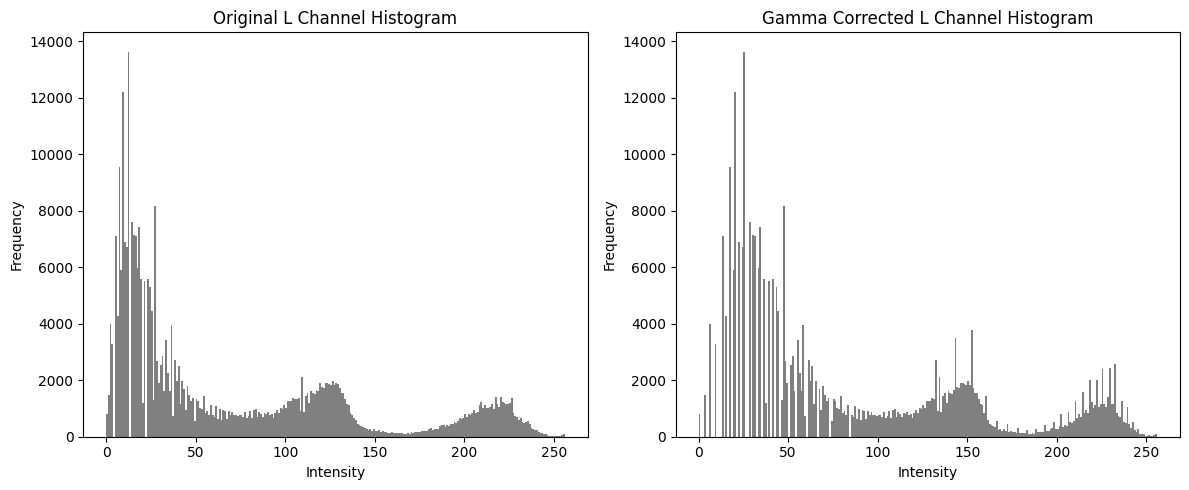

In [57]:
# Plot histograms for L channel
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Original L Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(L_modified.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Gamma Corrected L Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

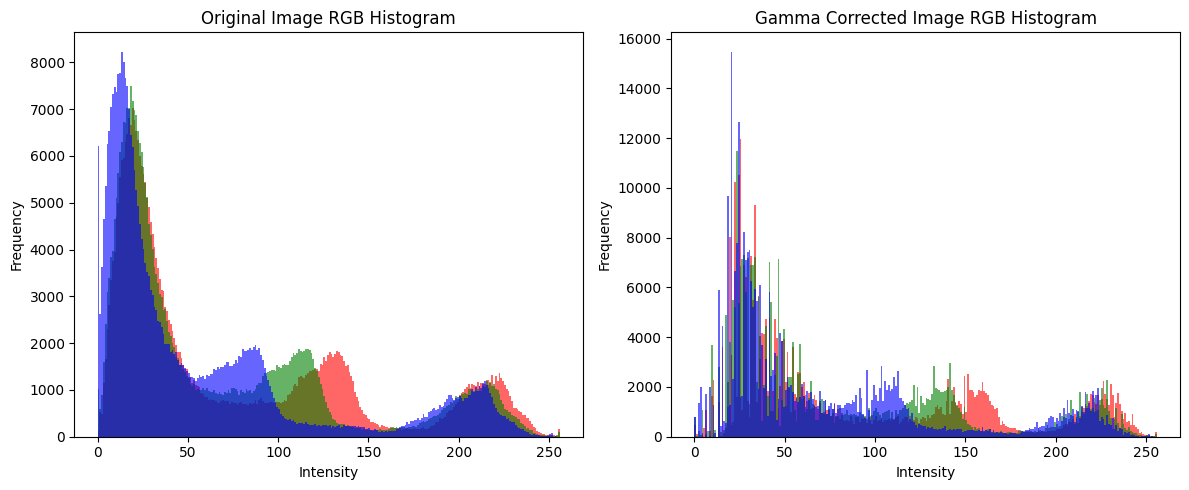

In [56]:
# Plot RGB histograms
colors = ('r', 'g', 'b')
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    plt.hist(imq3_rgb[:, :, i].ravel(), bins=256, range=(0, 256), color=col, alpha=0.6)
plt.title('Original Image RGB Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    plt.hist(imq3_modified[:, :, i].ravel(), bins=256, range=(0, 256), color=col, alpha=0.6)
plt.title('Gamma Corrected Image RGB Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##Question 4